In [1]:
from astropy.io import fits
import scipy.io
import scipy
import numpy as np
import healpy as hp
import sys
import os
sys.path.append('/Users/rubybyrne/rlb_MWA/sky_imaging')
import healpix_utils
import plot_healpix_map

In [2]:
obs = ['1131453936', '1131716512']

In [3]:
path = '/Volumes/Bilbo/rlb_fhd_outputs/diffuse_survey/fhd_rlb_diffuse_baseline_cut_optimal_weighting_Mar2020'

In [4]:
# get pixels to consider
field_center = hp.pixelfunc.ang2vec(0., -27., lonlat=True)
field_radius = 13.5

map = healpix_utils.load_map(
    '/Users/rubybyrne/diffuse_survey_plotting_May2020/nsamples_map_more_obs.fits'
)

pix_use = []
signal_use = []
for ind, pix in enumerate(map.pix_arr):
    pix_vec = hp.pix2vec(map.nside, pix, nest=map.nest)
    dist_deg = hp.rotator.angdist(pix_vec, field_center)*180./np.pi
    if dist_deg <= field_radius:
        pix_use.append(pix)
        signal_use.append(map.signal_arr[ind])

map.signal_arr = np.array(signal_use)
map.pix_arr = np.array(pix_use)

Loading HEALPix map /Users/rubybyrne/diffuse_survey_plotting_May2020/nsamples_map_more_obs.fits


In [5]:
map1 = healpix_utils.load_map(
    '{}/output_data/{}_weighted_Residual_I_HEALPix.fits'.format(path, obs[0])
)
map2 = healpix_utils.load_map(
    '{}/output_data/{}_weighted_Residual_I_HEALPix.fits'.format(path, obs[1])
)

Loading HEALPix map /Volumes/Bilbo/rlb_fhd_outputs/diffuse_survey/fhd_rlb_diffuse_baseline_cut_optimal_weighting_Mar2020/output_data/1131453936_weighted_Residual_I_HEALPix.fits
Loading HEALPix map /Volumes/Bilbo/rlb_fhd_outputs/diffuse_survey/fhd_rlb_diffuse_baseline_cut_optimal_weighting_Mar2020/output_data/1131716512_weighted_Residual_I_HEALPix.fits


In [6]:
combined_maps, weight_maps = healpix_utils.average_healpix_maps(
    path,
    obs_lists = obs,
    nside=128,
    cube_names=['Residual_I'],
    weighting='weighted',
    apply_radial_weighting=False,
    apply_rm_correction=False
)

Observation weights not provided. Using equal weighting.
Averaging 2 observations from /Volumes/Bilbo/rlb_fhd_outputs/diffuse_survey/fhd_rlb_diffuse_baseline_cut_optimal_weighting_Mar2020
Loading observation 1 of 2
Loading HEALPix map /Volumes/Bilbo/rlb_fhd_outputs/diffuse_survey/fhd_rlb_diffuse_baseline_cut_optimal_weighting_Mar2020/output_data/1131453936_weighted_Residual_I_HEALPix.fits
Loading observation 2 of 2
Loading HEALPix map /Volumes/Bilbo/rlb_fhd_outputs/diffuse_survey/fhd_rlb_diffuse_baseline_cut_optimal_weighting_Mar2020/output_data/1131716512_weighted_Residual_I_HEALPix.fits


In [ ]:
shared_pix = [pix for pix in pix_use if pix in map2.pix_arr and pix in map1.pix_arr]

In [ ]:
map1.signal_arr[np.where(map1.pix_arr == 65543)[0]]

In [ ]:
map2.signal_arr[np.where(map2.pix_arr == 65543)[0]]

In [ ]:
combined_maps[0].signal_arr[np.where(combined_maps[0].pix_arr == 65543)[0]]

In [ ]:
(map1.signal_arr[np.where(map1.pix_arr == 65543)[0]]+map2.signal_arr[np.where(map2.pix_arr == 65543)[0]])/2

In [ ]:
for pix in shared_pix:
    print ((map1.signal_arr[np.where(map1.pix_arr == pix)[0]][0]+map2.signal_arr[np.where(map2.pix_arr == pix)[0]][0])/2
    - combined_maps[0].signal_arr[np.where(combined_maps[0].pix_arr == pix)[0]][0])

In [ ]:
colorbar_range = [-1e4, 1e4]
plot_healpix_map.plot_filled_pixels(
    combined_maps[0],
    '/Users/rubybyrne/diffuse_survey_plotting_May2020/eor0_plots/test_plot.png',
    colorbar_range=colorbar_range
)

Observation weights not provided. Using equal weighting.
Averaging 2 observations from /Volumes/Bilbo/rlb_fhd_outputs/diffuse_survey/fhd_rlb_diffuse_baseline_cut_optimal_weighting_Mar2020
Loading observation 1 of 2
Loading HEALPix map /Volumes/Bilbo/rlb_fhd_outputs/diffuse_survey/fhd_rlb_diffuse_baseline_cut_optimal_weighting_Mar2020/output_data/1131453936_weighted_Residual_I_HEALPix.fits
Loading observation 2 of 2
Loading HEALPix map /Volumes/Bilbo/rlb_fhd_outputs/diffuse_survey/fhd_rlb_diffuse_baseline_cut_optimal_weighting_Mar2020/output_data/1131716512_weighted_Residual_I_HEALPix.fits


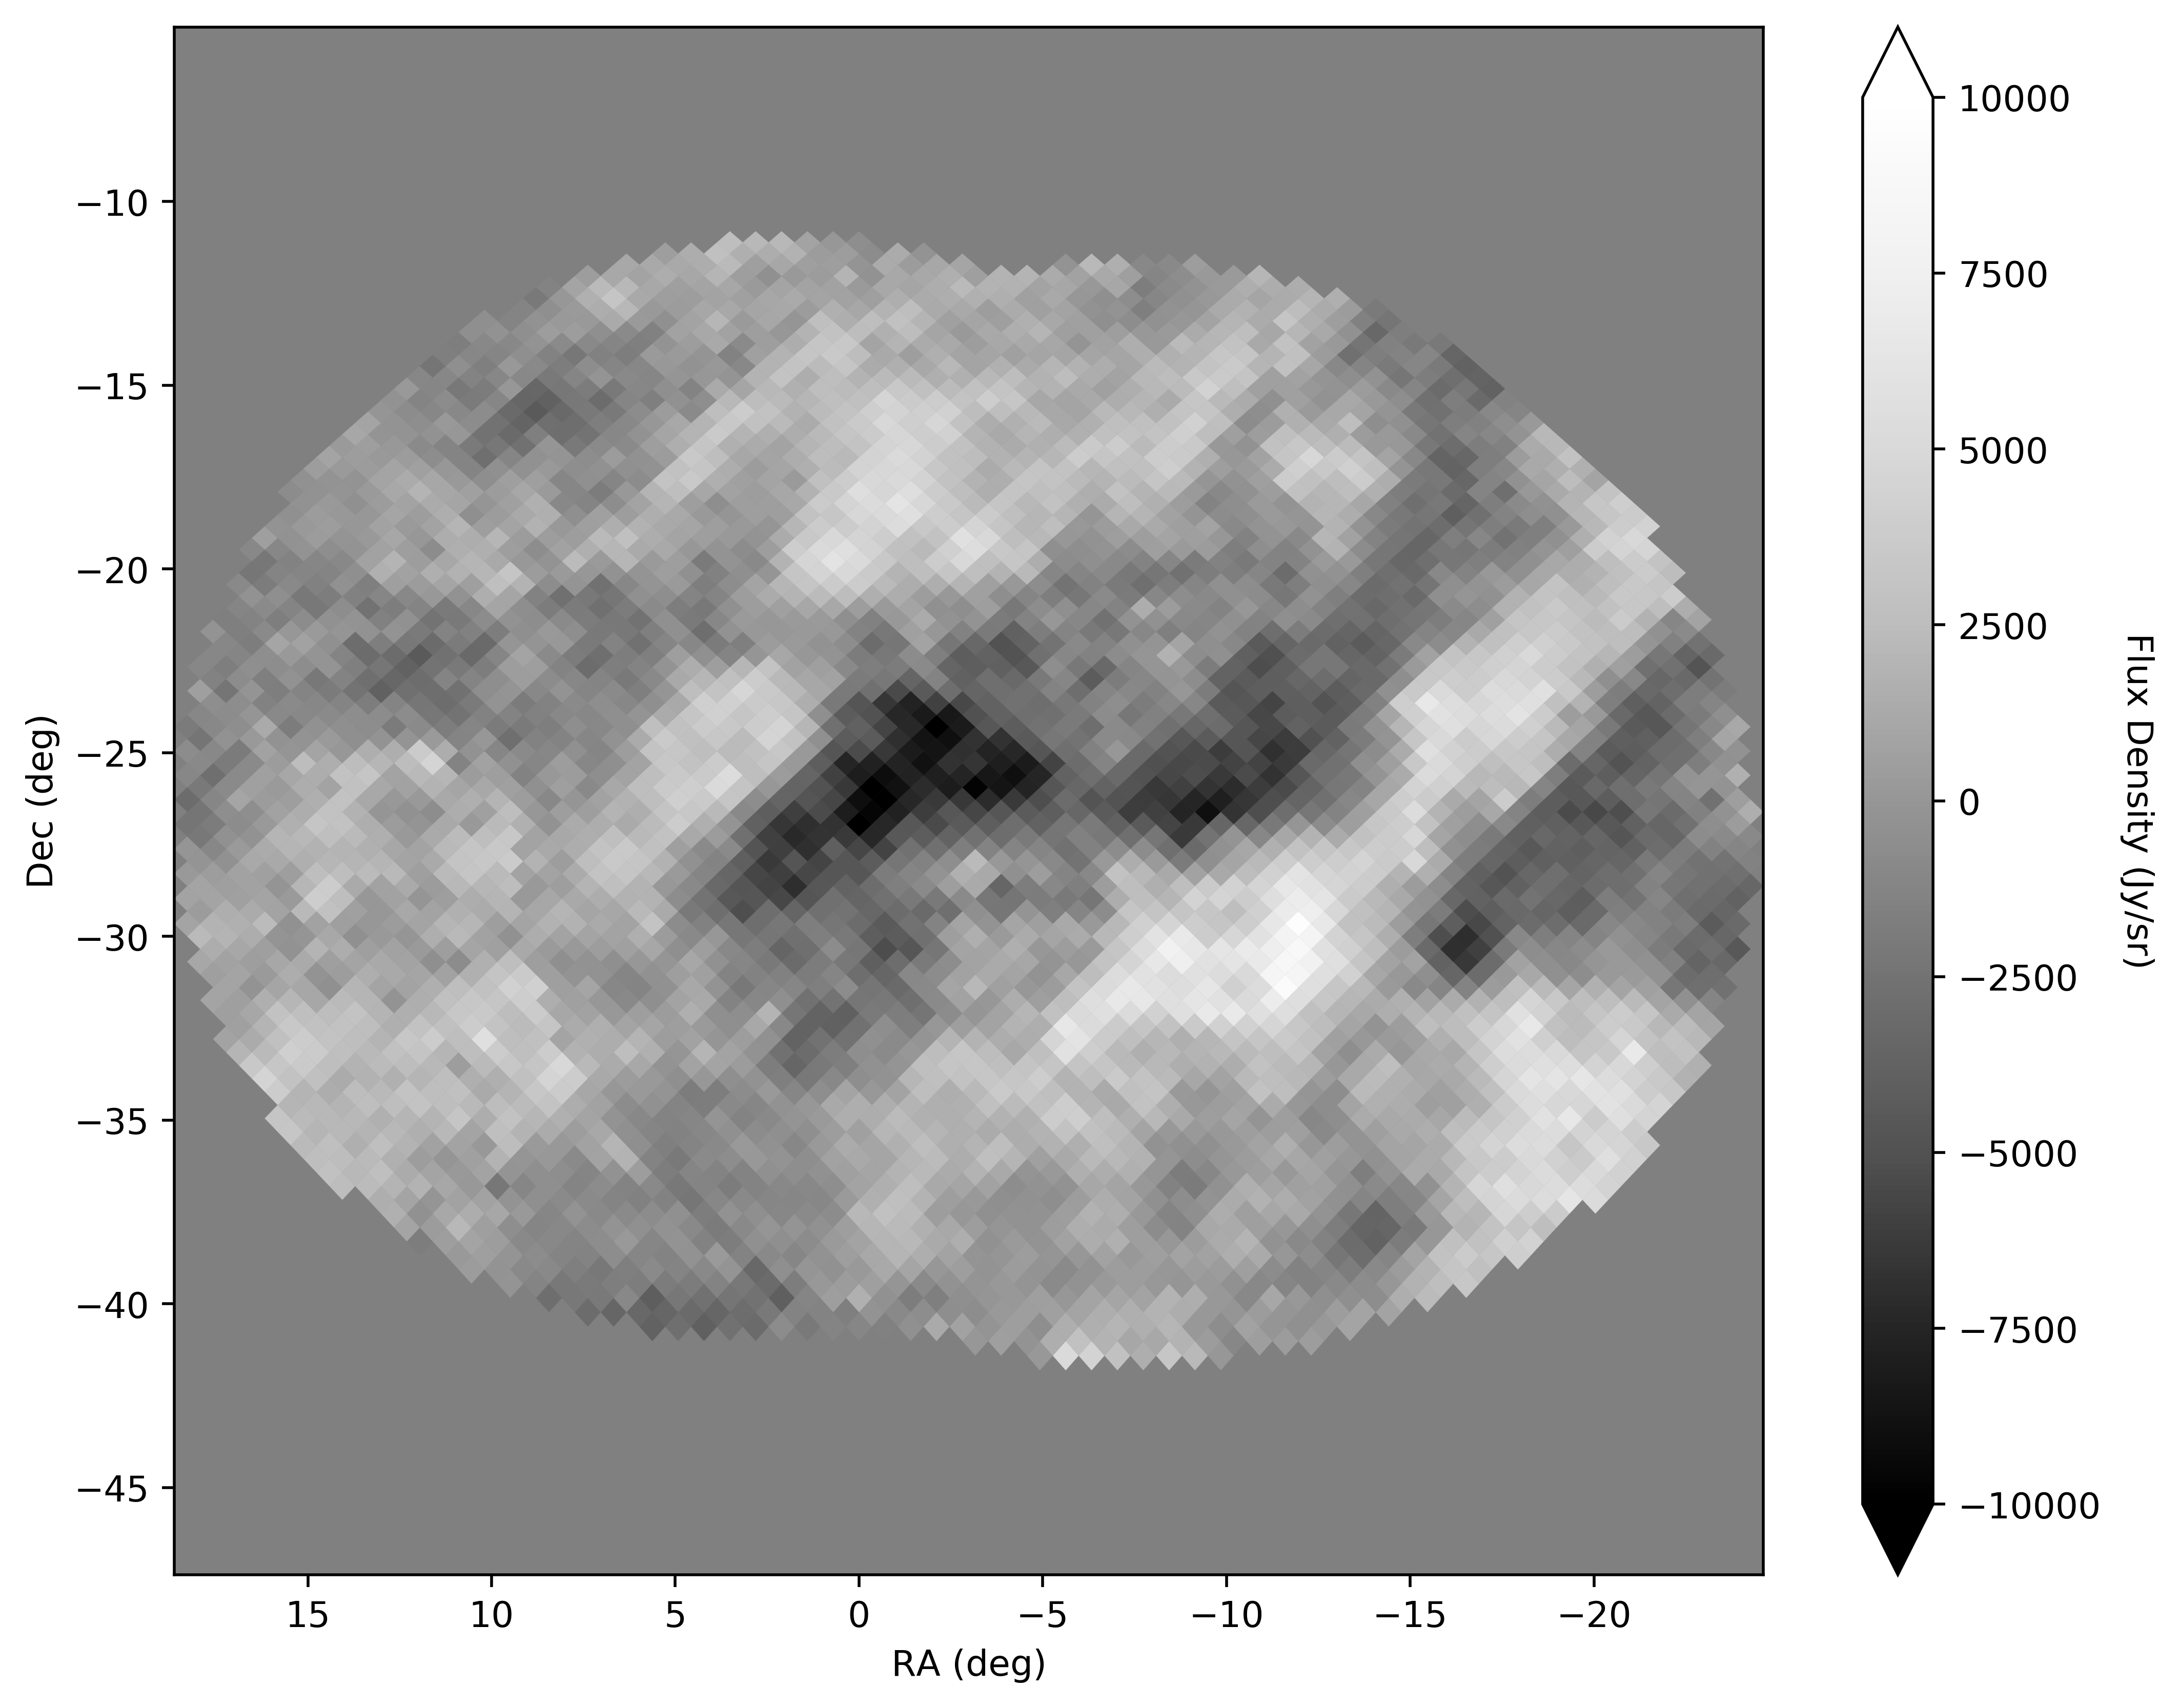

In [7]:
combined_maps_one_pol, weight_maps = healpix_utils.average_healpix_maps(
    path,
    obs_lists = ['1131453936', '1131716512'],
    nside=128,
    cube_names=['Residual_I'],
    weighting='weighted',
    apply_radial_weighting=False,
    apply_rm_correction=False
)
colorbar_range = [-1e4, 1e4]
plot_healpix_map.plot_filled_pixels(
    combined_maps_one_pol[0],
    colorbar_range=colorbar_range
)

Observation weights not provided. Using equal weighting.
Averaging 2 observations from /Volumes/Bilbo/rlb_fhd_outputs/diffuse_survey/fhd_rlb_diffuse_baseline_cut_optimal_weighting_Mar2020
Loading observation 1 of 2
Loading HEALPix map /Volumes/Bilbo/rlb_fhd_outputs/diffuse_survey/fhd_rlb_diffuse_baseline_cut_optimal_weighting_Mar2020/output_data/1131453936_weighted_Residual_I_HEALPix.fits
Loading HEALPix map /Volumes/Bilbo/rlb_fhd_outputs/diffuse_survey/fhd_rlb_diffuse_baseline_cut_optimal_weighting_Mar2020/output_data/1131453936_weighted_Residual_Q_HEALPix.fits
Loading HEALPix map /Volumes/Bilbo/rlb_fhd_outputs/diffuse_survey/fhd_rlb_diffuse_baseline_cut_optimal_weighting_Mar2020/output_data/1131453936_weighted_Residual_U_HEALPix.fits
Loading HEALPix map /Volumes/Bilbo/rlb_fhd_outputs/diffuse_survey/fhd_rlb_diffuse_baseline_cut_optimal_weighting_Mar2020/output_data/1131453936_weighted_Residual_V_HEALPix.fits
Loading observation 2 of 2
Loading HEALPix map /Volumes/Bilbo/rlb_fhd_outputs

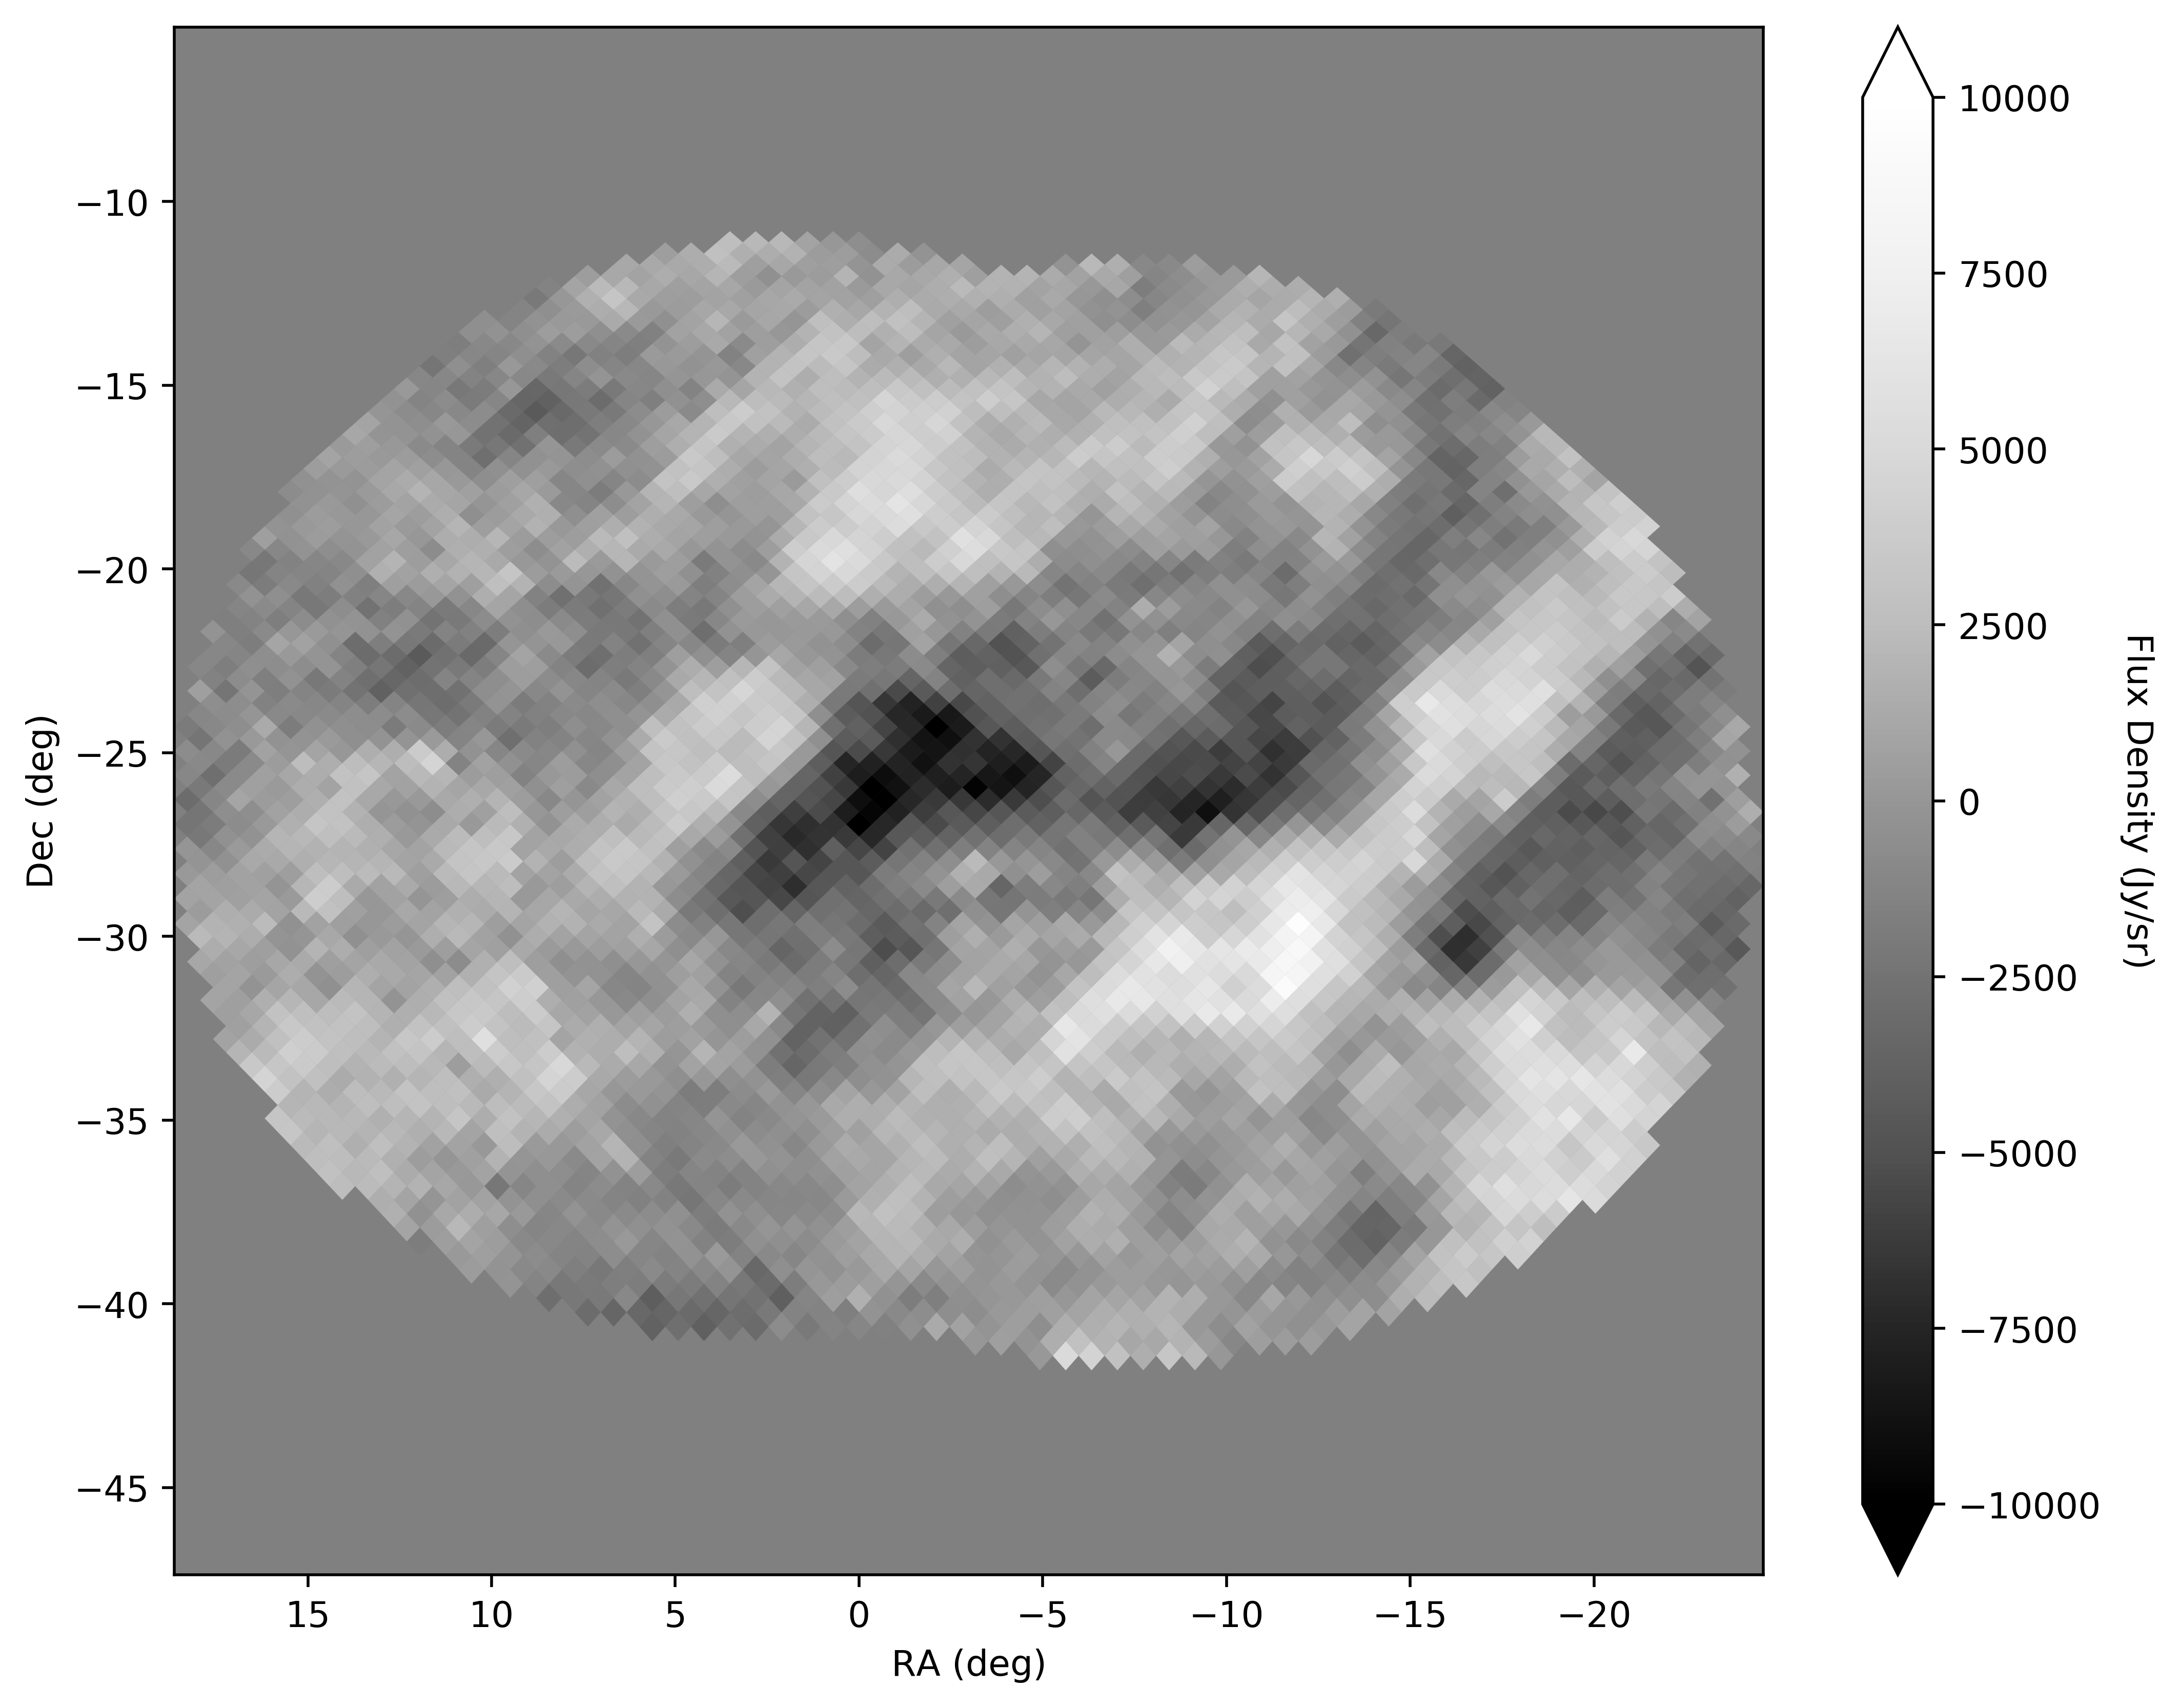

In [8]:
combined_maps_with_all_pol, weight_maps = healpix_utils.average_healpix_maps(
    path,
    obs_lists = ['1131453936', '1131716512'],
    nside=128,
    cube_names=['Residual_I', 'Residual_Q', 'Residual_U', 'Residual_V'],
    weighting='weighted',
    apply_radial_weighting=False,
    apply_rm_correction=False
)
colorbar_range = [-1e4, 1e4]
plot_healpix_map.plot_filled_pixels(
    combined_maps_with_all_pol[0],
    colorbar_range=colorbar_range
)

In [ ]:
diff = np.zeros(len(combined_maps_with_all_pol[0].pix_arr))
for ind, pix in enumerate(combined_maps_with_all_pol[0].pix_arr):
    diff[ind] = combined_maps_with_all_pol[0].signal_arr[ind]-combined_maps_one_pol[0].signal_arr[np.where(combined_maps_one_pol[0].pix_arr == pix)[0]]

In [ ]:
np.max(diff)

In [ ]:
obs_groups = [
    ['1131454296'],
    ['1131455736'],
    ['1131710392'],
    ['1131708952'],
    ['1131710032', '1131713632'],
    ['1131457176', '1131715432'],
    ['1131453936', '1131716512'],
    ['1131537104', '1131709912', '1131456096']
]

for group_ind, group in enumerate(obs_groups):

    if len(group) > 1 and group_ind==6:
        print group
        combined_maps, weight_maps = healpix_utils.average_healpix_maps(
            path,
            obs_lists = group,
            nside=128,
            cube_names=['Residual_I', 'Residual_Q', 'Residual_U', 'Residual_V'],
            weighting='weighted',
            apply_radial_weighting=False,
            apply_rm_correction=True
        )
        pols = ['I', 'Q', 'U', 'V']
        for map_ind in range(len(combined_maps)):
            pol = pols[map_ind]
            combined_maps[map_ind].signal_arr = np.array([
                combined_maps[map_ind].signal_arr[
                    np.where(combined_maps[map_ind].pix_arr == pix)[0]
                ][0] for pix in map.pix_arr
            ])
            combined_maps[map_ind].pix_arr = map.pix_arr
            if pol == 'I':
                colorbar_range = [-1e4, 1e4]
            else:
                colorbar_range = [-2e3, 2e3]
            plot_healpix_map.plot_filled_pixels(
                combined_maps[map_ind],
                colorbar_range=colorbar_range
            )